In [ ]:
#Load Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import math

# Perform EDA on Home Equity Loan data
Key Definitions:
* `TARGET_BAD_FLAG`: indicates whether or not the loan was defaulted.
* When `TARGET_BAD_FLAG` is set to 1 = loan default; when set to 0 = loan repaid
* `TARGET_LOSS_AMT`: indicates the amount of money lost upon default

Goal:
* Impute missing values
* Implement one-hot encoding
* Provide insight based on your findings *(See block-style '''Comments''')*

In [ ]:
# Load file into Google Collab
HMEQ = pd.read_csv('/content/sample_data/HMEQ_Loss.csv')

In [ ]:
# Print .head()
print('The first five rows in dataframe:''\n', HMEQ.head(),'\n')

# Shape of data
print('The initial shape of the data:', HMEQ.shape,'\n')

# Print .dtypes()
dt_listing = HMEQ.dtypes
print(dt_listing,'\n')

# List all column variables
print('List of all columns within the data:\n', HMEQ.columns,'\n')

# Find missing values
print('Total # of missing values:')
print(HMEQ.isnull().sum(), '\n')

The first five rows in dataframe:
    TARGET_BAD_FLAG  TARGET_LOSS_AMT  LOAN  ...  NINQ  CLNO DEBTINC
0                1            641.0  1100  ...   1.0   9.0     NaN
1                1           1109.0  1300  ...   0.0  14.0     NaN
2                1            767.0  1500  ...   1.0  10.0     NaN
3                1           1425.0  1500  ...   NaN   NaN     NaN
4                0              NaN  1700  ...   0.0  14.0     NaN

[5 rows x 14 columns] 

The initial shape of the data: (5960, 14) 

TARGET_BAD_FLAG      int64
TARGET_LOSS_AMT    float64
LOAN                 int64
MORTDUE            float64
VALUE              float64
REASON              object
JOB                 object
YOJ                float64
DEROG              float64
DELINQ             float64
CLAGE              float64
NINQ               float64
CLNO               float64
DEBTINC            float64
dtype: object 

List of all columns within the data:
 Index(['TARGET_BAD_FLAG', 'TARGET_LOSS_AMT', 'LOAN', 'MORTDUE'

In [ ]:
# Percent of missing values per dtype
'''This is useful to know before immediately dropping rows or columns.'''
HMEQ.isnull().sum()/len(HMEQ)

TARGET_BAD_FLAG    0.000000
TARGET_LOSS_AMT    0.800503
LOAN               0.000000
MORTDUE            0.086913
VALUE              0.018792
REASON             0.042282
JOB                0.046812
YOJ                0.086409
DEROG              0.118792
DELINQ             0.097315
CLAGE              0.051678
NINQ               0.085570
CLNO               0.037248
DEBTINC            0.212584
dtype: float64

Distribution of values within columns:
                   count           mean  ...            75%            max
TARGET_BAD_FLAG  5960.0       0.199497  ...       0.000000       1.000000
TARGET_LOSS_AMT  1189.0   13414.576955  ...   17634.000000   78987.000000
LOAN             5960.0   18607.969799  ...   23300.000000   89900.000000
MORTDUE          5442.0   73760.817200  ...   91488.000000  399550.000000
VALUE            5848.0  101776.048741  ...  119824.250000  855909.000000
YOJ              5445.0       8.922268  ...      13.000000      41.000000
DEROG            5252.0       0.254570  ...       0.000000      10.000000
DELINQ           5380.0       0.449442  ...       0.000000      15.000000
CLAGE            5652.0     179.766275  ...     231.562278    1168.233561
NINQ             5450.0       1.186055  ...       2.000000      17.000000
CLNO             5738.0      21.296096  ...      26.000000      71.000000
DEBTINC          4693.0      33.779915  ...      39.003141     203.31214

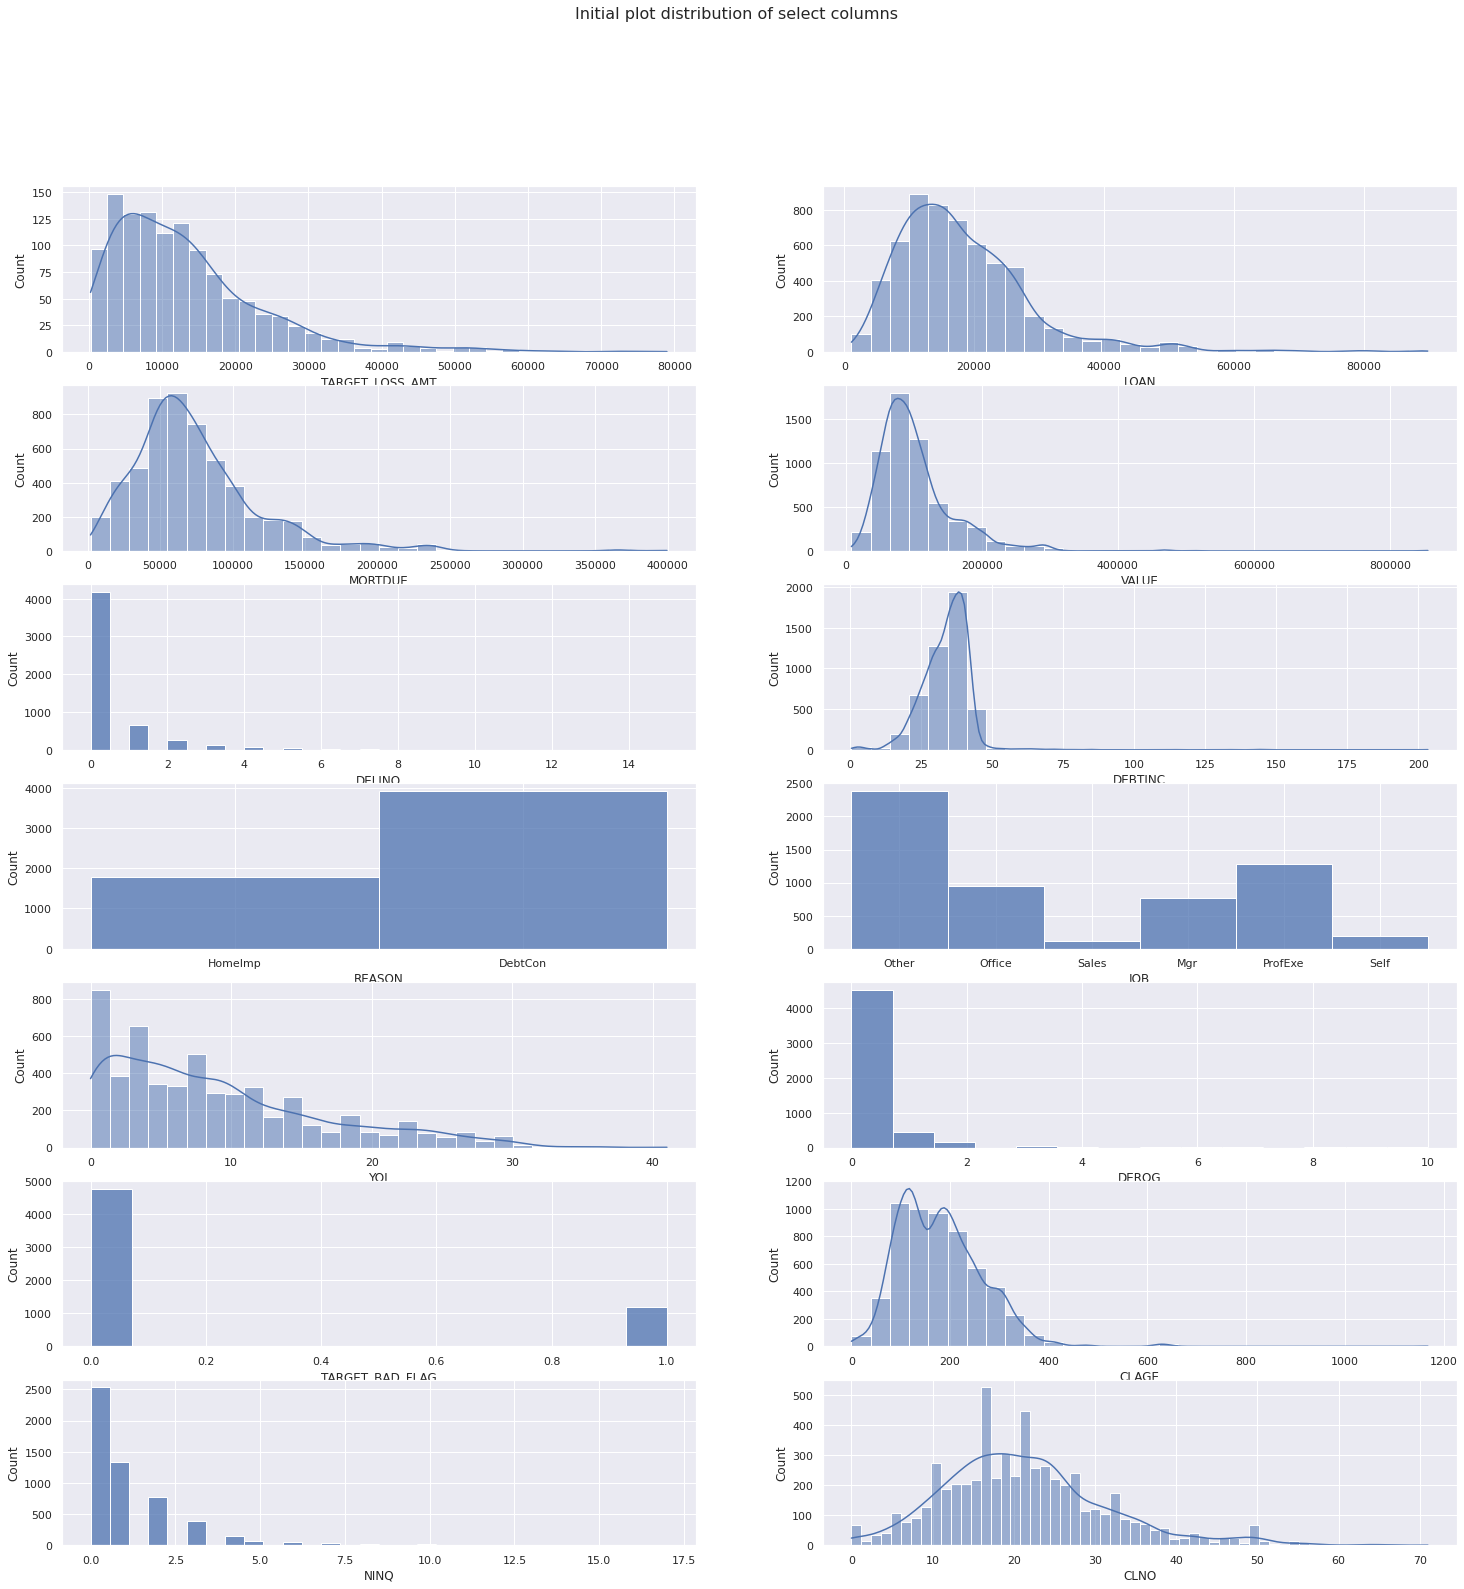

In [ ]:
'''
Rather than hardcode the plot distribution, next time run a for loop and iterate
through objList and numList and use plt or sns
'''
# Looking at the distribution of values across each variable
distribution_values = list(HMEQ.columns)
print('Distribution of values within columns:\n',
      HMEQ[distribution_values].describe().T)

# Create a plot distribution to look for any patterns
sns.set() 
figures, axes = plt.subplots(7, 2, figsize=(25, 25))
figures.suptitle('Initial plot distribution of select columns', size=16)
sns.histplot(HMEQ['TARGET_LOSS_AMT'], ax=axes[0, 0], kde=True)
sns.histplot(HMEQ['LOAN'], ax=axes[0, 1], bins=30, kde=True)
sns.histplot(HMEQ['MORTDUE'], ax=axes[1, 0], bins=30, kde=True)
sns.histplot(HMEQ['VALUE'], ax=axes[1, 1], bins=30, kde=True)
sns.histplot(HMEQ['DELINQ'], ax=axes[2, 0], bins=30 )
sns.histplot(HMEQ['DEBTINC'], ax=axes[2, 1], bins=30, kde=True)
sns.histplot(HMEQ['REASON'], ax=axes[3, 0])
sns.histplot(HMEQ['JOB'], ax=axes[3, 1])
sns.histplot(HMEQ['YOJ'], ax=axes[4, 0],bins=30, kde=True)
sns.histplot(HMEQ['DEROG'], ax=axes[4, 1])
sns.histplot(HMEQ['TARGET_BAD_FLAG'], ax=axes[5, 0])
sns.histplot(HMEQ['CLAGE'], ax=axes[5, 1], bins=30, kde=True)
sns.histplot(HMEQ['NINQ'], ax=axes[6, 0], bins=30, )
sns.histplot(HMEQ['CLNO'], ax=axes[6, 1], kde=True)


Plot shows the average # of delinquencies for applicants within the last 3 yrs: 1.0 



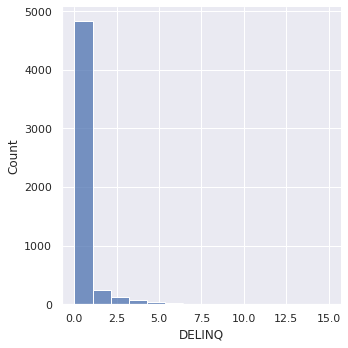

In [ ]:
# Closer look at DELINQ this time using a custom function
# round_up() might come in handy later or not
def round_up(n, decimals=0):
  '''Deals with the issue of python not rounding as expected using round().'''
  multiplier = 10 ** decimals
  return math.ceil(n * multiplier) / multiplier

'''Most applicants have at least 1 previous delinquency within the last 3'''
print(sns.displot(HMEQ['DELINQ']), '\n')
print('Plot shows the average # of delinquencies for applicants within the last 3 yrs:',
      round_up(HMEQ['DELINQ'].mean()), '\n')

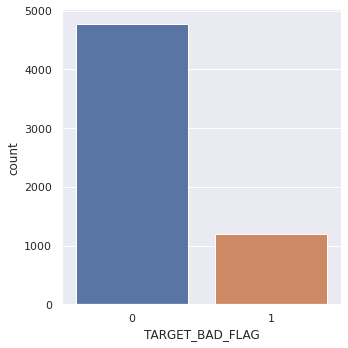

Total # of loans in current status: 4771
Total # of loans in default status: 1189
Total accounts in default (%): 0.249214001257598
Total accounts in good standing (%) 0.750785998742402


In [ ]:
# How many loans are "in default" compared to loans that "current"
sns.catplot(x='TARGET_BAD_FLAG', kind='count', data=HMEQ)
plt.show()

# What % of our portfolio is in default
for flag in HMEQ['TARGET_BAD_FLAG']:
  current_loans = HMEQ['TARGET_BAD_FLAG'] == 0
  print('Total # of loans in current status:', current_loans.sum())
  break 

for flag in HMEQ['TARGET_BAD_FLAG']:
  defaulted_loans = HMEQ['TARGET_BAD_FLAG'] == 1
  print('Total # of loans in default status:', defaulted_loans.sum())
  break 

# What is the overall % of lending across all accounts (current vs default)
accounts_in_default = defaulted_loans.sum() / current_loans.sum()
accounts_in_good_standing = 1 - accounts_in_default 
print("Total accounts in default (%):", accounts_in_default)
print("Total accounts in good standing (%)", accounts_in_good_standing)

<Figure size 432x288 with 0 Axes>

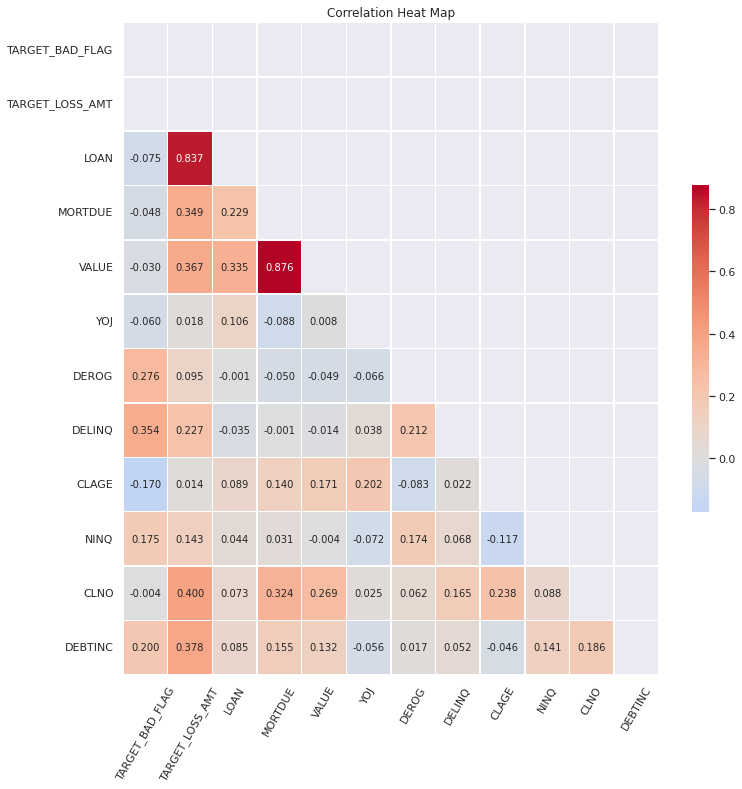

In [ ]:
# Looking for any correlations
# Random test
# print('Correlation between loan amount & debt-to-income ratio:',
#       test_df1['LOAN'].corr(other = test_df1['DEBTINC']))

# Larger look at correlations across all columns
def heat_map_corr(map_corr):
    corr=map_corr.corr()
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top , cmap='coolwarm', 
        center = 0, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 10}, fmt = '.3f')           
    plt.xticks(rotation=60) 
    plt.yticks(rotation=0) 
    plt.title('Correlation Heat Map')

corr_list = ['TARGET_BAD_FLAG', 'TARGET_LOSS_AMT', 'LOAN', 'MORTDUE', 'VALUE',
             'REASON', 'JOB', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO',
             'DEBTINC']

corr_list_test = HMEQ[corr_list]
heat_map_corr(map_corr=corr_list_test)

# Handling missing values using **imputation**

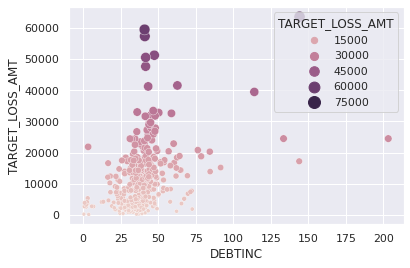

In [ ]:
# Scatter plot: TARGET_LOSS_AMT vs DEBTINC
plot = sns.scatterplot(x='DEBTINC', y='TARGET_LOSS_AMT', data=HMEQ, 
                       hue='TARGET_LOSS_AMT', size='TARGET_LOSS_AMT',
                       sizes=(15,150), legend='brief')

In [ ]:
# Rename both target variables: TARGET_BAD_FLAG, TARGET_AMT_LOSS
TARGET_F = 'TARGET_BAD_FLAG'
TARGET_L = 'TARGET_LOSS_AMT'

# Create a test dataframe 
test_df1 = HMEQ

# Print dtypes
all_dt = test_df1.dtypes
# Create list objects consisting of each dtype: Object, Int, Float, String (if applicable)
# Iterate through those lists and find dtypes of the same kind
# Organize those objects by dtype and ignore TARGET_F and TARGET_L
objList = []
numList = []

for i in all_dt.index:
  '''Did not need to exclude 'TARGET_F' and 'TARGET_L, but did so anyway'''
  if i in ([TARGET_F, TARGET_L]): continue
  if all_dt[i] in (['object']): objList.append(i)
  if all_dt[i] in (['float64', 'int64']): numList.append(i)

print('Non-numeric variables:\n', objList,'\n')
print('Numeric variables:\n', numList)

Non-numeric variables:
 ['REASON', 'JOB'] 

Numeric variables:
 ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']


In [ ]:
# Taking a closer look at our objList
for i in objList:
  show_me = test_df1[i].value_counts(dropna=False)
  print('\n')
  print(show_me)



DebtCon    3928
HomeImp    1780
NaN         252
Name: REASON, dtype: int64


Other      2388
ProfExe    1276
Office      948
Mgr         767
NaN         279
Self        193
Sales       109
Name: JOB, dtype: int64


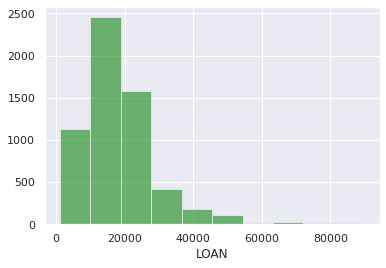

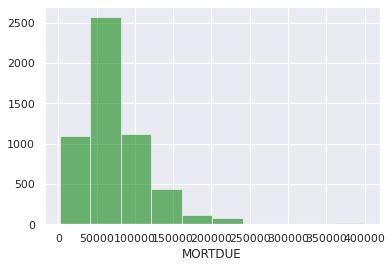

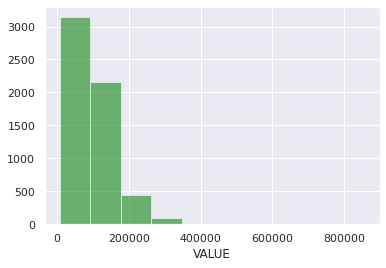

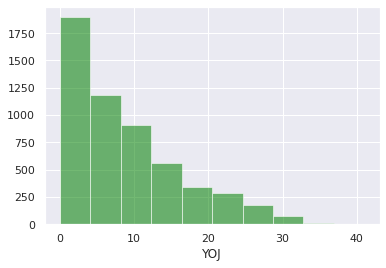

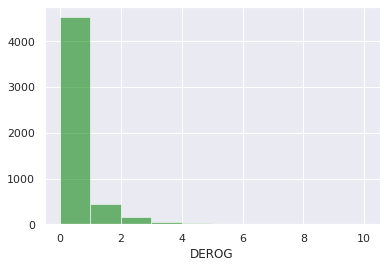

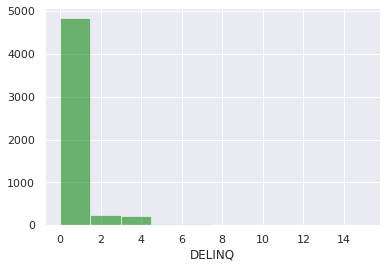

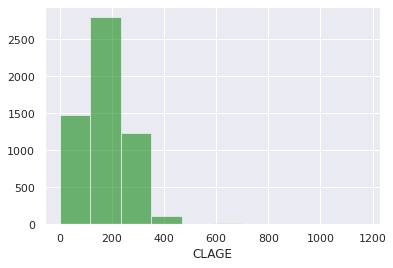

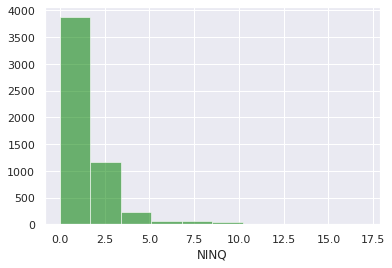

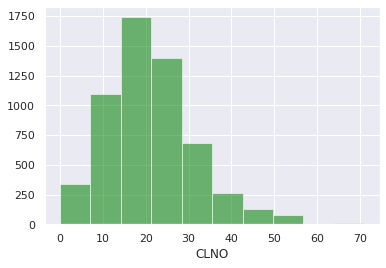

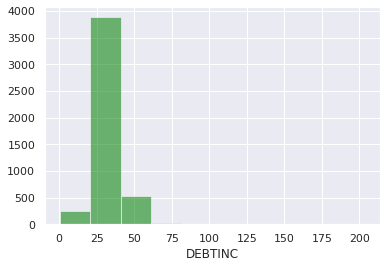

In [ ]:
# Ex of running for loop and not hardcoding plot distributions
for i in numList:
  sns.set()
  plt.hist(test_df1[i], color='green', alpha=0.55)
  plt.xlabel(i)
  plt.show()

DebtCon    3928
HomeImp    1780
NaN         252
Name: REASON, dtype: int64 



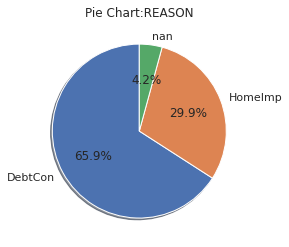

Other      2388
ProfExe    1276
Office      948
Mgr         767
NaN         279
Self        193
Sales       109
Name: JOB, dtype: int64 



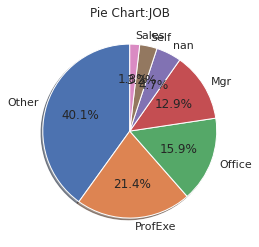

In [ ]:
# Look at % of applicants seeking DebtCon and HomeImp
for i in objList:
  result = test_df1[i].value_counts(dropna=False)
  print(result, '\n')
  labels = result.axes[0].tolist()
  # print(labels)
  slices = list(result)
  plt.pie(slices, labels=labels, startangle=90, shadow=True,
          autopct='%1.1f%%')
  plt.title('Pie Chart:' + i)
  plt.show()

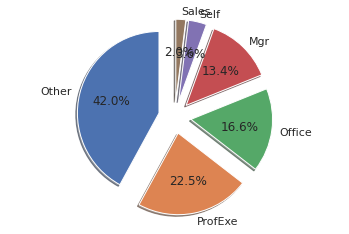

In [ ]:
'''Exploding the pie chart for JOB looks better here'''
labels2 = 'Other', 'ProfExe', 'Office', 'Mgr', 'Self', 'Sales'
sizes =[2506,1339,989,796,213,117]
explode =(0.2,0.2,0.2,0.2,0.2,0.2) 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels2, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
# Fill in missing values for objList
for i in objList:
  '''REASON is purpose of loan request'''
  test_df1['REASON'] = test_df1['REASON'].fillna(method='ffill')
 
  '''JOB is applicant's occupation'''
  test_df1['JOB'] = test_df1['JOB'].fillna(method='ffill')
  break

DebtCon    4104
HomeImp    1856
Name: REASON, dtype: int64 



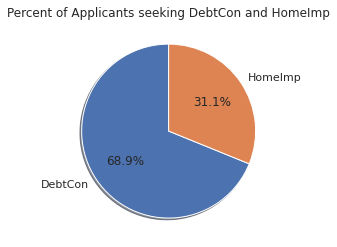

In [ ]:
# Verify fillna for test_df1['REASON']
for i in objList:
  result = test_df1[i].value_counts(dropna=False)
  print(result, '\n')
  labels = result.axes[0].tolist()
  # print(labels)
  slices = list(result)
  plt.pie(slices, labels=labels, startangle=90, shadow=True,
          autopct='%1.1f%%')
  plt.title("Percent of Applicants seeking DebtCon and HomeImp")
  plt.show()
  break

In [ ]:
# Fill in missing values using an appropiate method
for i in numList: 
  '''CLAGE is credit line age in months'''
  if test_df1[i].isna().sum() == 0: continue
  mean_value = test_df1['CLAGE'].mean()
  test_df1['CLAGE'] = test_df1['CLAGE'].fillna(value=mean_value)

  '''CLNO is # of credit lines'''
  mean_value = test_df1['CLNO'].mean()
  test_df1['CLNO'] = test_df1['CLNO'].fillna(value=mean_value)

  '''NINQ is # of credit inquiries'''
  mean_value = test_df1['NINQ'].mean()
  test_df1['NINQ'] = test_df1['NINQ'].fillna(value=mean_value)

  '''DELINQ is # of delinquencies on credit report (last 3 yrs)'''
  mean_value = test_df1['DELINQ'].mean()
  test_df1['DELINQ'] = test_df1['DELINQ'].fillna(value=mean_value)

  '''DEBTINC is DTI ratio (%)'''
  mean_value = test_df1['DEBTINC'].mean()
  test_df1['DEBTINC'] = test_df1['DEBTINC'].fillna(value=mean_value)

  '''DEROG is # of bad marks on credit report (last 7 yrs)'''
  mean_value = test_df1['DEROG'].mean()
  test_df1['DEROG'] = test_df1['DEROG'].fillna(value=mean_value)

  '''YOJ is # yrs of employment'''
  mean_value = test_df1['YOJ'].mean()
  test_df1['YOJ'] = test_df1['YOJ'].fillna(value=mean_value)
  
  '''VALUE is # yrs of employment'''
  mean_value = test_df1['VALUE'].mean()
  test_df1['VALUE'] = test_df1['VALUE'].fillna(value=mean_value)

  '''MORTDUE amount of mortgage owed'''
  mean_value = test_df1['MORTDUE'].mean()
  test_df1['MORTDUE'] = test_df1['MORTDUE'].fillna(value=mean_value)

  '''LOAN amount of mortgage owed'''
  mean_value = test_df1['LOAN'].mean()
  test_df1['LOAN'] = test_df1['LOAN'].fillna(value=mean_value)
  break

In [ ]:
# Fill in missing values for TARGET_L or TARGET_LOSS_AMT
mean_value = test_df1['TARGET_LOSS_AMT'].mean()
test_df1['TARGET_LOSS_AMT'] = test_df1['TARGET_LOSS_AMT'].fillna(value=mean_value)

In [ ]:
# Verify fillna()
print(test_df1.isnull().sum(),'\n')
print(test_df1.dtypes)

TARGET_BAD_FLAG    0
TARGET_LOSS_AMT    0
LOAN               0
MORTDUE            0
VALUE              0
REASON             0
JOB                0
YOJ                0
DEROG              0
DELINQ             0
CLAGE              0
NINQ               0
CLNO               0
DEBTINC            0
dtype: int64 

TARGET_BAD_FLAG      int64
TARGET_LOSS_AMT    float64
LOAN                 int64
MORTDUE            float64
VALUE              float64
REASON              object
JOB                 object
YOJ                float64
DEROG              float64
DELINQ             float64
CLAGE              float64
NINQ               float64
CLNO               float64
DEBTINC            float64
dtype: object


# Performing **One-Hot-Encoding**


In [ ]:
'''Initial attempt at using OneHotEncoder()'''
# Create an instance of OneHotEncoder()
encoder = OneHotEncoder(handle_unknown='ignore')

# Create initial dataframe
reason = ('DebtCon', 'HomeImp')
encoded_reason_df = pd.DataFrame(reason, columns=['REASON'])

# Generate binary values using get_dummies()
dummy_df = pd.get_dummies(reason, columns=['REASON'])

# Join dummy_df with encoded_reason_df
final_reason_df = encoded_reason_df.join(dummy_df)
print(final_reason_df)

    REASON  DebtCon  HomeImp
0  DebtCon        1        0
1  HomeImp        0        1


In [ ]:
'''Using lecture's approach to one-hot-encoding'''
for i in objList :
  print("Class = ", i )
  thePrefix = "IMP_" + i
  print( thePrefix )
  y = pd.get_dummies(test_df1[i], prefix = thePrefix, dummy_na = False)
  print(type(y) )
  print(y.head().T )
  test_df1 = pd.concat([test_df1, y], axis = 1 )
  test_df1 = test_df1.drop(i, axis = 1 )

print(test_df1.head().T)

Class =  REASON
IMP_REASON
<class 'pandas.core.frame.DataFrame'>
                    0  1  2  3  4
IMP_REASON_DebtCon  0  0  0  0  0
IMP_REASON_HomeImp  1  1  1  1  1
Class =  JOB
IMP_JOB
<class 'pandas.core.frame.DataFrame'>
                 0  1  2  3  4
IMP_JOB_Mgr      0  0  0  0  0
IMP_JOB_Office   0  0  0  0  1
IMP_JOB_Other    1  1  1  1  0
IMP_JOB_ProfExe  0  0  0  0  0
IMP_JOB_Sales    0  0  0  0  0
IMP_JOB_Self     0  0  0  0  0
                               0             1  ...              3              4
TARGET_BAD_FLAG         1.000000      1.000000  ...       1.000000       0.000000
TARGET_LOSS_AMT       641.000000   1109.000000  ...    1425.000000   13414.576955
LOAN                 1100.000000   1300.000000  ...    1500.000000    1700.000000
MORTDUE             25860.000000  70053.000000  ...   73760.817200   97800.000000
VALUE               39025.000000  68400.000000  ...  101776.048741  112000.000000
YOJ                    10.500000      7.000000  ...       8.92226